## 확률변수
- 표본공간 S의 각 원소 e들에 대해 하나의 실수에 대응되는 함수 X.
- S가 정의역. R(실수집합)이 공역인 함수
- ex. 앞면-0, 뒷면-1;

#### 예제 1. 동전 3번 던질 때 표본공간
- S={HHH,HHT,HTH,HTT,THH,THT,TTH,TTT}.
- 300,100,-100,-300이 나올 수 있다.

## 확률변수의 분류

### 이산확률변수
- 유한개. 셀 수 있는 무한개의 값을 갖는 것
### 연속확률변수
- 수식선 상 임의의 값

## 확률분포
- 확률변수와 그에 대응되는 확룰

### 이산확률분포 (확률질량함수)
- 확률분포표, 그래프로 표현.
- 다 더하면 1, 각각의 확률은 0 과 1 사이.
#### 예제2.
 1/ㅎ 3Cx*0.5^x, x=0,1,2,3



In [3]:
library(prob);
S<-rolldie(4);#주사위 던지기.

str(S);
#S의 행렬 합을 이용해 확률변수 X 생성
X=apply(S,1,sum)

'data.frame':	1296 obs. of  4 variables:
 $ X1: int  1 2 3 4 5 6 1 2 3 4 ...
 $ X2: int  1 1 1 1 1 1 2 2 2 2 ...
 $ X3: int  1 1 1 1 1 1 1 1 1 1 ...
 $ X4: int  1 1 1 1 1 1 1 1 1 1 ...


X
  4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23 
  1   4  10  20  35  56  80 104 125 140 146 140 125 104  80  56  35  20  10   4 
 24 
  1 

[1] 1296

X
     4      5      6      7      8      9     10     11     12     13     14 
0.0008 0.0031 0.0077 0.0154 0.0270 0.0432 0.0617 0.0802 0.0965 0.1080 0.1127 
    15     16     17     18     19     20     21     22     23     24 
0.1080 0.0965 0.0802 0.0617 0.0432 0.0270 0.0154 0.0077 0.0031 0.0008 

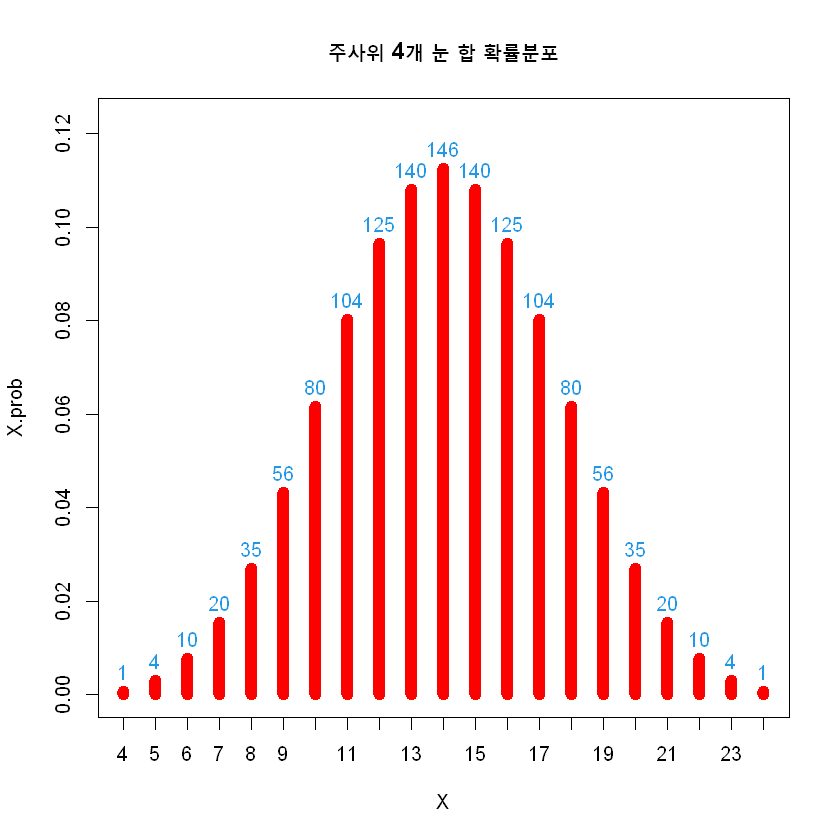

In [20]:
#확률변수 X의 분포
X.freq<-table(X);X.freq
sum(X.freq)
X.prob=X.freq/length(X);#확률이니까 나누기
round(X.prob,4);#반올림
plot(X.prob,type='h',col='red',main='주사위 4개 눈 합 확률분포',lwd=10,ylim=c(0,max(X.prob)+0.01))#tpye='h' 타입. 막대형

#값. 도수를 표시해보자
text(4:24,X.prob,labels=X.freq,pos=3,col=4)#pos=3: 위쪽. col=4: 파란색 

## 예제 3::  확률변수와 확률분포

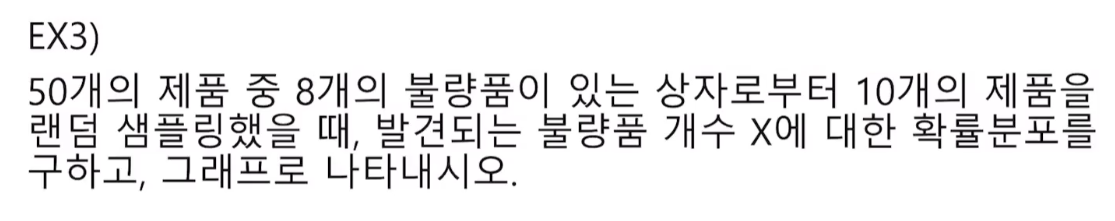

In [50]:
#문제 설정 입력 (전체 50개. 샘플 10개 불량품 8개)
npop=50; nsamp=10;ndef=8;

# 확률분포 나타내는 함수의 분모: choose()를 이용해서 직접 계산
demon=choose(npop,nsamp);demon; #50개 중 10개 뽑는 경우의 수
freq=choose(ndef,0:ndef)*choose(npop-ndef,nsamp-(0:ndef));fred; #8개 중 -~8개. 그리고 (50-8)게 중 8개

#확률변수에 대응되는 확룰
fx=freq/demon;fx;

[1] 10272278170

[1] 1471442973 3567134480 3304845180 1510786368  367205020   47637408    3134040
[8]      91840        861

[1] 1.432441e-01 3.472584e-01 3.217247e-01 1.470741e-01 3.574718e-02
[6] 4.637473e-03 3.050969e-04 8.940568e-06 8.381782e-08

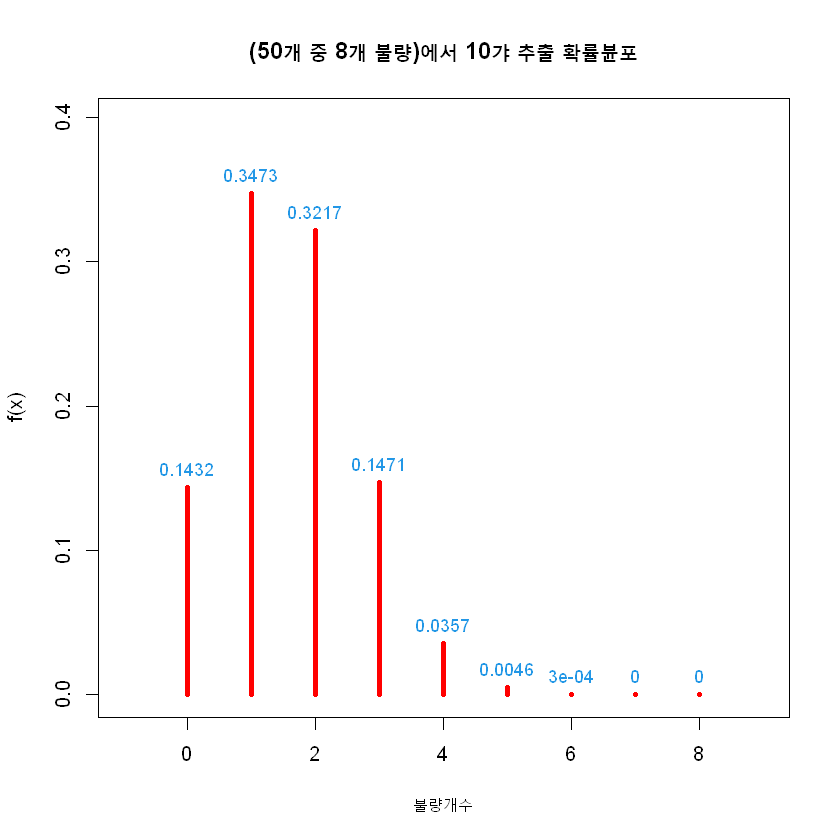

In [65]:
#그림으로 나타내기
plot(0:8,fx,type='h',col='red',lwd=4,xlim=c(-1,9),ylim=c(0,max(fx)+0.05), main='(50개 중 8개 불량)에서 10갸 추출 확률뷴포',xlab='불량개수',ylab='f(x)');

#확률표시
text(0:8,fx,labels=round(fx,4),pos=3,cex=0.9,col=4)#cex는 글자 크기

## 확률분포
### 연속확률분포
- 연속적인 값을 갖음
- 확률분포함수는 확률밀도함수라고 부름
- 다 적분하면 0됨. 그리고 f(x)>=0

#### 예제 4
- 확률밀도함수가 f(x)=2 exp(-2x), 0<x<inf일 때, 이게 연속확률분포임을 보이고 P(0<x<1)
- 적분한다.

#### 누적분포함수
- F(x)
- 확률분포에서 x 이하일 확률
- 등호 이하임을 주의

##### 예제 5
- 동전 3번 던지는 시행에서 누적 분포함수 구하기
- 일단, f(x)=1/8,f(1)=3/8, f(2)=3/8, f(x)=1/8임,
- F(x)={ 0 (x<0), 1/8 (0<=x<1), 1/2 1<=x<2} ....

In [111]:
#누적분포함수 실흡
Fx=function(x){
    if(x<0){ y=0;}
    else if (x<1){y=1/8;
    } else if (x<2){y=1/2;
    } else if (x<3){y=7/8;
    } else y=1;
    return (y);
}
Fx(2.5)

#누적분포함수를 백터용 함수로 전환.
VFx=Vectorize(Fx,'x');
VFx(2.00000000000000001
   )

[1] 0.875

[1] 0.875

Warning message in text.default(0:3, VFx(0:3), labels = VFx(0:3), type = "h", col = 4, :
"그래픽 파라미터 "type"는 필요하지 않습니다"


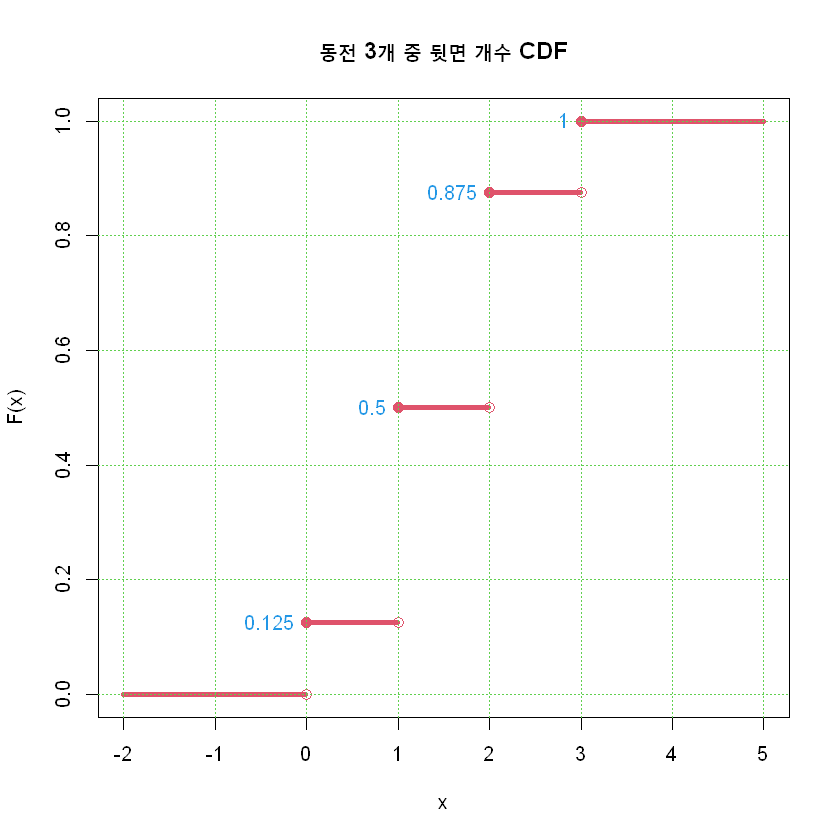

In [112]:
#x 영역 설정
xrange=(-200:500)/100;
#누적분포함수 F(x)그리기
plot(xrange,VFx(xrange),cex=0.6,main='동전 3개 중 뒷면 개수 CDF',col=2,xlab='x',ylab='F(x)')

#경계 점 강조. 속이 꽉 찬 점, 속이 빈 점 그리기
points(0:3,VFx(0:3),pch=19,col=2,cex=1.2)
points(0:3,VFx(0:3-0.01),col=2,cex=1.2)

#격자
grid(col=3);
#확률표시
text(0:3,VFx(0:3),labels=VFx(0:3),type='h',col=4,pos=2)

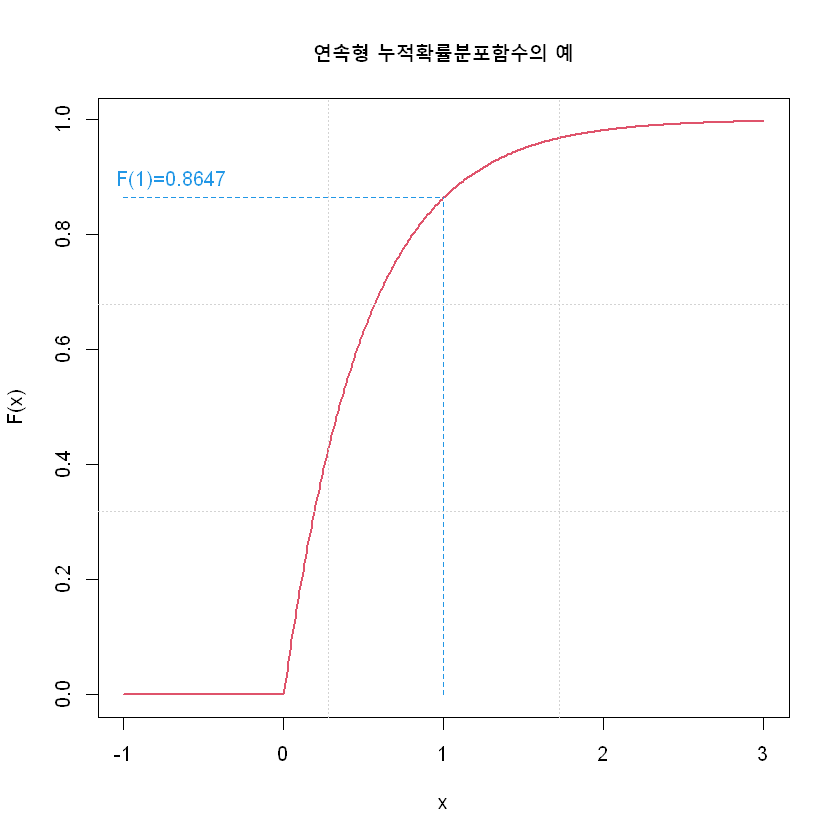

In [122]:
#연속일 통해 구하시오... (예제 6)
# 직접 적분해보면 F(x)=1-e^x 됨
Fx<-function(x){
    if(x<0){y=0;
    }else {y=1-exp(-2*x);}
    
    return (y);#괄호 안 치면 오류남
}
VFx=Vectorize(Fx,'x');
xrange=(-100:300)/100;

plot(xrange,VFx(xrange),type='l',lwd=2,main='연속형 누적확률분포함수의 예',col=2,xlab='x',ylab='F(x)'); #l: 라인.
grid(3);
#점선
segments(-1,Fx(1),1,Fx(1),lty=2,col=4) #가로점선
segments(1,0,1,Fx(1),lty=2,col=4) #세로점선
text(-0.7,Fx(1),labels=paste0('F(1)=',round(Fx(1),4)),col=4,pos=3)

# 과제

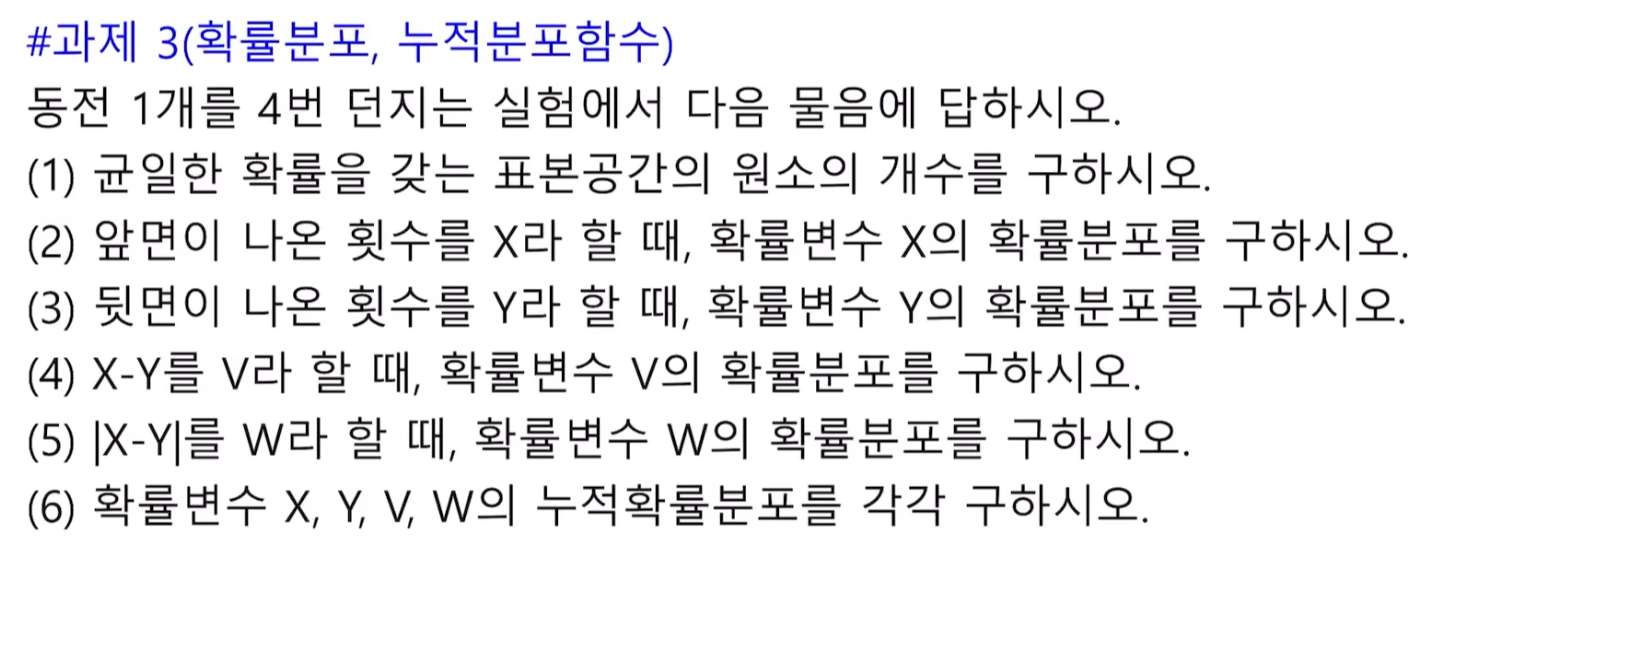
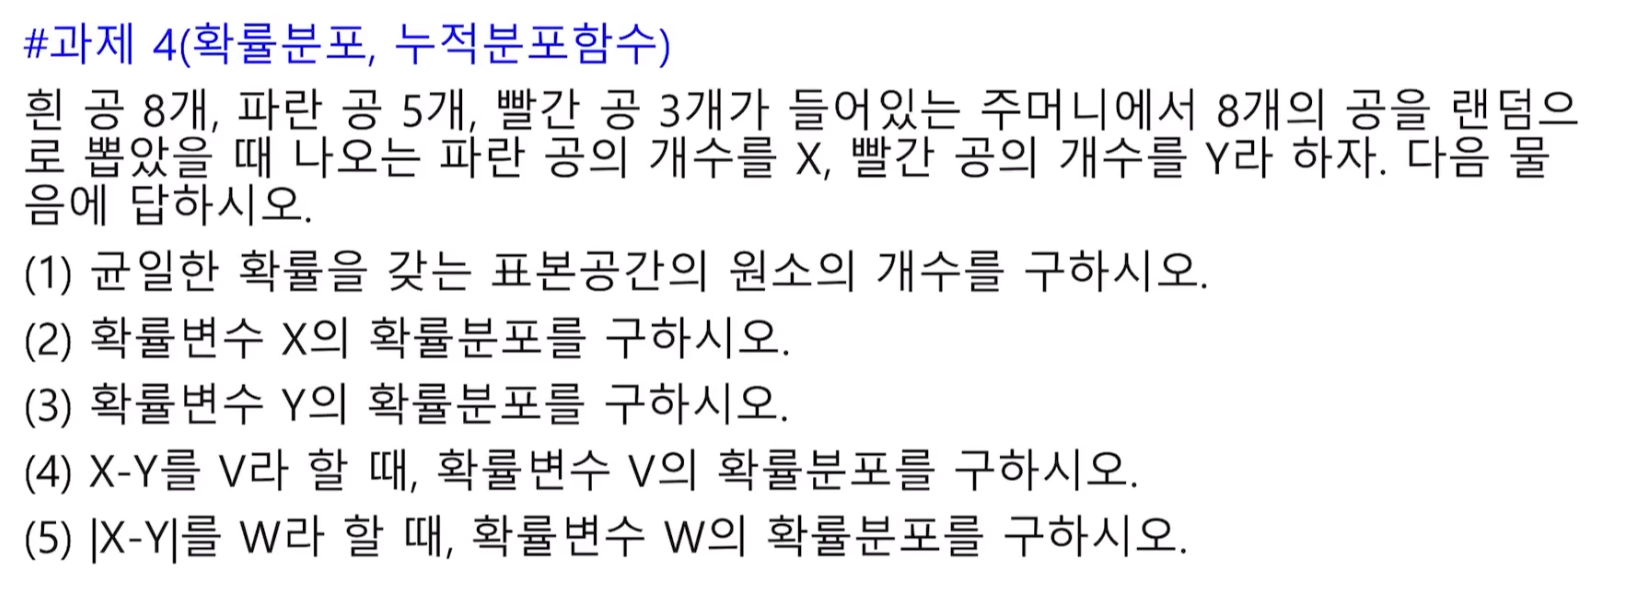